### Прирост информации

За функционал качества при работе с деревом решений принимается **прирост информации** (information gain):

$$Q(X_{m}, j, t) = H(X_{m}) - \frac{|X_{l}|}{|X_{m}|}H(X_{l}) - \frac{|X_{r}|}{|X_{m}|}H(X_{r}),$$


где $X_{m}$ - множество объектов, попавших в вершину на данном шаге,   
$X_{l}$ и $X_{r}$ - множества, попадающие в левое и правое поддерево после разбиения.   
$H(X)$ - _критерий информативности_.




В качестве **критерия информативности** для задачи классификации можно использовать:
- _Энтропийный критерий_ или _энтропия Шеннона_ :

$$H(X) = - \sum^{K}_{k=1}p_{k}\text{log}_{2}p_{k}.$$



- _Критерий Джини_ или _индекс Джини_:

$$H(X) = \sum^{K}_{k=1}p_{k}(1-p_{k}) = 1 - \sum_{k=1}^K{p_k^2} ,$$

  где $K$ - количество классов в наборе данных $X$.







# Обрезка (pruninng) деревьев решений

- Обрезка деревьев решений нужна для того, чтобы избежать переобучения, поскольку глубокие деревья часто запоминают шумы и несущественные детали обучающей выборки. Это приводит к плохой обобщающей способности на новых данных.  
- Удаление бесполезных ветвей упрощает модель, делает её легче для интерпретации и уменьшает вероятность переусложнения. Также обрезка делает дерево компактнее, что снижает вычислительные затраты.
- Есть два основных метода: предварительная обрезка, когда рост дерева ограничивается заранее, и постобрезка, когда сначала строится полное дерево, а потом удаляются незначимые узлы.
- Маленькие деревья чаще демонстрируют лучшую работу на тестовых данных, так как они сосредоточены на главных закономерностях и не обращают внимания на мелкие отклонения и шумы, характерные для обучающей выборки.  

 **В итоге обрезка помогает создать более простую, быструю и эффективную модель.**

Мы будем использовать кросс-валидацию для того, чтобы определить, как лучше обрезать дерево решений.

Кросс-валидация — это метод оценки качества модели на основе разделения данных на несколько частей, чтобы проверить её способность обобщать на новых данных. Идея заключается в том, чтобы многократно обучать модель на одной части данных (обучающей выборке) и тестировать её на другой части (валидационной выборке), чередуя такие разбиения. Это позволяет получить более надёжную оценку производительности модели, сравнивая её результаты на разных участках данных.

### Как работает кросс-валидация:
1. Исходные данные разделяются на k частей (в классическом варианте — k-fold cross-validation).
2. На каждом шаге одна из частей используется как валидационная выборка, а оставшиеся части — как обучающая выборка.
3. Модель обучается на обучающих данных и тестируется на валидационных, после чего фиксируется её точность.
4. Процесс повторяется k раз, чтобы каждая часть данных побывала в роли валидационной выборки.
5. В итоге усредняется качество модели по всем итерациям, что даёт сбалансированное представление о её обобщающей способности.


![](https://habrastorage.org/getpro/habr/post_images/e17/94b/51e/e1794b51eded0314afd9f594a8e9ee5e.png)

Этот метод позволит нам разделить исходные данные на несколько подвыборок, где на одной части данных дерево обучается, а на другой проверяется его производительность. Путём оценки качества модели на валидационных наборах мы сможем понять, какое количество обрезанных узлов или какое ограничение на глубину дерева обеспечивает наилучшую обобщающую способность. Таким образом, кросс-валидация поможет нам избежать переобучения и выбрать оптимальный баланс между сложностью дерева и его точностью на новых данных.

В дереве решений параметры управляют структурой и поведением модели. Вот описание параметров, которые вы упомянули (`max_depth`, `min_samples_split`, `min_samples_leaf`) для `DecisionTreeRegressor` (или аналогично для `DecisionTreeClassifier`):

---

### 1. `max_depth` (Максимальная глубина дерева):
- Описание: это максимальное количество уровней (глубина) в дереве. Ограничивает, насколько глубоко дерево может разветвляться при построении.
- Диапазон значений: целое число или `None`.
  - Если установить `max_depth=None`, дерево будет расти до тех пор, пока все листья не станут чистыми (все значения одного класса или предельная ошибка) или пока количество точек в узле не станет меньше, чем параметры `min_samples_split` или `min_samples_leaf`.
  - Небольшое `max_depth` приводит к более простому дереву (меньше свободных параметров, предотвращение переобучения), тогда как большое значение позволяет дереву больше "запоминать" данные.
- Пример:
  - если `max_depth=3`, дерево может иметь не более 3 уровней глубины.

---

### 2. `min_samples_split` (Минимальное число выборок для разделения узла):
- Описание: это минимальное количество примеров в узле, которые должны быть для того, чтобы узел мог быть разделён.
  - Если в узле меньше выборок, чем `min_samples_split`, то узел становится листом, что предотвращает его разветвление.
- Диапазон значений: целое число (например, `2`, `5`, `10`) или доля (например, `0.1`, что означает 10% от размера обучающей выборки).
  - Если установить долю, то параметр будет динамически зависеть от размера выборки.
- Пример:
  - Если `min_samples_split=10`, узел не сможет быть разделён, если в нём меньше 10 образцов, даже если происходит значительное снижение ошибки.
- Упрощение контроля:
  - Большее значение `min_samples_split` приводит к менее сложному дереву (меньшее количество разбиений), что уменьшает переобучение.
  - Меньшее значение позволяет дереву лучше подстраиваться под данные (увеличивает сложность).

---

### 3. `min_samples_leaf` (Минимальное количество выборок в листе):
- Описание: это минимальное количество примеров, которые должны оставаться в каждом листе дерева решений (конечном узле).
  - Узлы, в которых окажется меньше примеров, чем этот параметр, не будут разветвляться.
- Диапазон значений: целое число (например, `1`, `2`, `4`) или доля (например, `0.05`).
- Пример:
  - Если `min_samples_leaf=2`, каждый лист дерева должен содержать хотя бы 2 примера. Таким образом, дерево не будет разветвляться, если в узле недостаточно данных для формирования листа удовлетворяющего этому ограничению.
- Особенности:
  - Большее значение делает дерево более "жёстким": меньшее количество разбиений, уменьшение переобучения.
  - Меньшее значение делает дерево более "гибким", но увеличивает риск переобучения.


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
# Загрузка данных California Housing
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)  # Признаки
y = data.target  # Целевая переменная

# Определяем наборы параметров для обрезки
max_depths = [2, 3, 4, 5, 6, None]  # Ограничение по глубине
min_samples_splits = [2, 5, 10]  # Минимальное число выборок для разделения
min_samples_leafs = [1, 2, 4]  # Минимальный размер листа

# Перебираем гиперпараметры вручную
best_score = float('inf')  # Для задачи регрессии используем минимум, not максимум
best_params = {}

for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
        for min_samples_leaf in min_samples_leafs:
            # Создаем дерево решений для регрессии с текущими параметрами
            tree = DecisionTreeRegressor(
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf,
                random_state=42
            )

            # Проводим кросс-валидацию (5 фолдов)
            scores = cross_val_score(tree, X, y, cv=5, scoring='neg_mean_squared_error')
            mean_score = -np.mean(scores)  # Превращаем в MSE (точность: отрицательные значение)

            # Сравниваем текущие результаты с лучшими
            if mean_score < best_score:  # Здесь ищем минимальную ошибку
                best_score = mean_score
                best_params = {
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf
                }

# Выводим результаты
print("Лучшие параметры:")
print(best_params)
print("\nЛучшая средняя MSE на кросс-валидации: {:.4f}".format(best_score))

Лучшие параметры:
{'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 2}

Лучшая средняя MSE на кросс-валидации: 0.6389


# Подбор наиболее важных признаков

Деревья решений – это отличный инструмент для выбора наиболее важных признаков, потому что они сами по себе "понимают", какие признаки играют ключевую роль в процессе принятия решений. Когда дерево строится, оно проходит через данные и разделяет их на основе тех признаков, которые приносят наибольшую пользу для уменьшения неопределённости или ошибки. Например, если какой-то признак позволяет чётко разделить данные на группы, дерево будет использовать его чаще, и это сразу выдаёт нам его важность.

Удобно, что деревья могут работать с любыми типами данных, не требуя сложной предварительной обработки вроде нормализации. Кроме того, деревья способны учитывать не только прямое, но и косвенное взаимодействие признаков, что помогает им ловить сложные зависимости между переменными. Отдельным большим плюсом является то, что деревья очень интерпретируемы: мы можем буквально посмотреть на структуру дерева и понять, какие признаки влияют на результат.

Современные библиотеки, например, `scikit-learn`, делают эту задачу ещё проще. Во многих из них прямо "зашита" возможность вывести важность признаков – так называемую feature importance. Чем больше один признак снижает неопределённость в дереве (например, энтропию), тем выше его значимость. А если использовать ансамбли деревьев, такие как случайный лес или бустинг, то мы получим ещё более надёжную и усреднённую оценку важности, что делает отбор признаков ещё более точным.

В общем, деревья решений – это не только метод для предсказаний, но и очень мощный инструмент для анализа данных и выбора ключевых признаков. Они легко показывают, что действительно влияет на модель, а что можно отбросить без особых потерь.

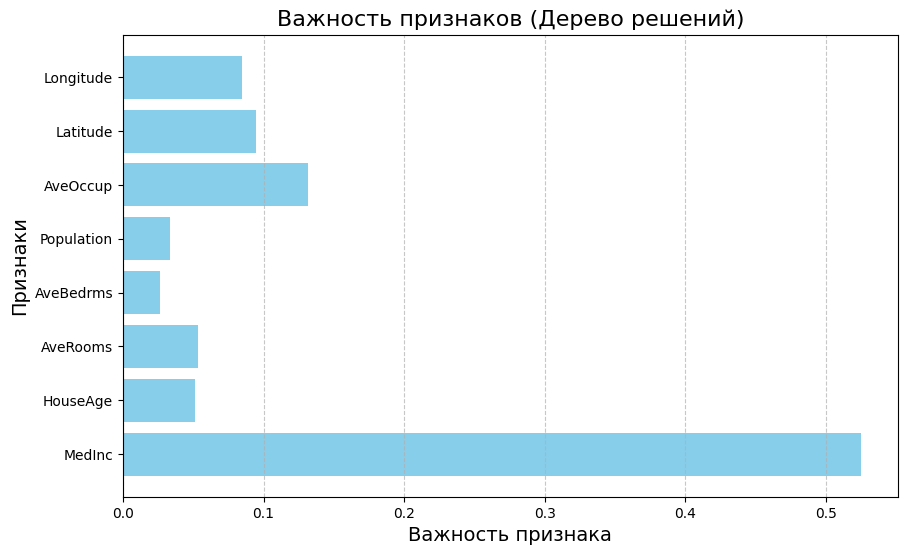

Важность признаков:
MedInc: 0.5248
AveOccup: 0.1316
Latitude: 0.0945
Longitude: 0.0846
AveRooms: 0.0532
HouseAge: 0.0515
Population: 0.0333
AveBedrms: 0.0264


In [ ]:
# Создание и обучение модели DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=420)
model.fit(X, y)

# Извлечение важности признаков
feature_importances = model.feature_importances_

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances, color='skyblue')
plt.xlabel('Важность признака', fontsize=14)
plt.ylabel('Признаки', fontsize=14)
plt.title('Важность признаков (Дерево решений)', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Вывод отсортированного списка признаков по их важности
sorted_features = sorted(zip(X.columns, feature_importances), key=lambda x: x[1], reverse=True)
print("Важность признаков:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")

1. **Самый важный фактор:**
   - Признак `MedInc` (медианный доход) самый значимый, его важность составляет более 45%. Это значит, что именно этот фактор сильнее всего влияет на результат модели.

2. **Средне важные факторы:**
   - `AveOccup` (средняя плотность заселения) занимает второе место по влиянию, её важность около 20%.
   - Также важны координаты `Latitude` (широта) и `Longitude` (долгота), но их влияние меньше – примерно 10% каждое.

3. **Менее важные факторы:**
   - Признаки `AveRooms` (среднее число комнат) и `HouseAge` (возраст дома) оказывают небольшое влияние, их значимость примерно одинаковая.
   - `Population` (численность населения) и `AveBedrms` (среднее число спален) почти не влияют на работу модели.

### Выводы:
- Основной фактор, который определяет работу модели, это медианный доход (`MedInc`).
- Наименее важные признаки (`Population` и `AveBedrms`) можно исключить, если нужно упростить модель, но окончательное решение зависит от целей анализа.

Стоит уделить больше внимания признакам с высокой значимостью, например, `MedInc` и `AveOccup`, чтобы улучшить результаты модели.